In [11]:
from qutip import basis, tensor, sigmaz, sigmax, sigmay, sigmam, sigmap, mesolve, identity, Qobj, destroy, qeye, Bloch, about

In [13]:
# spin0 is excited state 
spin0 = basis(2,0)
print(spin0)
print(sigmam()*spin0)

Quantum object: dims=[[2], [1]], shape=(2, 1), type='ket', dtype=Dense
Qobj data =
[[1.]
 [0.]]
Quantum object: dims=[[2], [1]], shape=(2, 1), type='ket', dtype=Dense
Qobj data =
[[0.]
 [1.]]


In [12]:
print(sigmam())

Quantum object: dims=[[2], [2]], shape=(2, 2), type='oper', dtype=CSR, isherm=False
Qobj data =
[[0. 0.]
 [1. 0.]]


In [31]:
print(sigmax())

Quantum object: dims=[[2], [2]], shape=(2, 2), type='oper', dtype=CSR, isherm=True
Qobj data =
[[0. 1.]
 [1. 0.]]


In [6]:
def numOp(m):
    """
    Computes the number operator 
    """
    return m.dag()*m

def rwaCoupling(m1, m2):
    """
    coupling
    """
    return m1.dag()*m2 + m1*m2.dag()

In [9]:
#print()
N=2
# cavity 1, 2, 3 destruction operators
a1 = tensor(destroy(N), qeye(N), qeye(N), qeye(2), qeye(2))
a2 = tensor(qeye(N), destroy(N), qeye(N), qeye(2), qeye(2))
a3 = tensor(qeye(N), qeye(N), destroy(N), qeye(2), qeye(2))

In [10]:
print(rwaCoupling(a1,a2))

Quantum object: dims=[[2, 2, 2, 2, 2], [2, 2, 2, 2, 2]], shape=(32, 32), type='oper', dtype=Dia, isherm=True
Qobj data =
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [20]:
# Define parameters
Jzz = 0.1  # ZZ coupling strength
omega_q1 = 1.0  # Qubit 1 frequency
omega_q2 = 1.2  # Qubit 2 frequency

# Define single-qubit Hamiltonians
H_q1 = omega_q1 * tensor(sigmaz(), qeye(2))  # Qubit 1
H_q2 = omega_q2 * tensor(qeye(2), sigmaz())  # Qubit 2

# Define ZZ interaction term
H_zz = Jzz * tensor(sigmaz(), sigmaz())

# Total Hamiltonian
H_total = H_q1 + H_q2 + H_zz

print(H_q2)

Quantum object: dims=[[2, 2], [2, 2]], shape=(4, 4), type='oper', dtype=CSR, isherm=True
Qobj data =
[[ 1.2  0.   0.   0. ]
 [ 0.  -1.2  0.   0. ]
 [ 0.   0.   1.2  0. ]
 [ 0.   0.   0.  -1.2]]


In [17]:
# Define parameters
Jzz = 0.1  # ZZ coupling strength
omega_q1 = 1.0  # Qubit 1 frequency
omega_q2 = 1.2  # Qubit 2 frequency

# Define single-qubit Hamiltonians
H_q1 = omega_q1 * tensor(sigmaz(), qeye(2))  # Qubit 1
H_q2 = omega_q2 * tensor(qeye(2), sigmaz())  # Qubit 2

# Define ZZ interaction term
H_zz = Jzz * sigmaz() * sigmaz()

# Total Hamiltonian
H_total = H_q1 + H_q2 + H_zz

print(H_total)

ValueError: incompatible dimensions [[2, 2], [2, 2]] and [[2], [2]]

c:\Users\jayamao\.conda\envs\qiskit\lib\site-packages\qutip\solver\solver_base.py:576: FutureWarning: e_ops will be keyword only from qutip 5.3 for all solver
  warnings.warn(


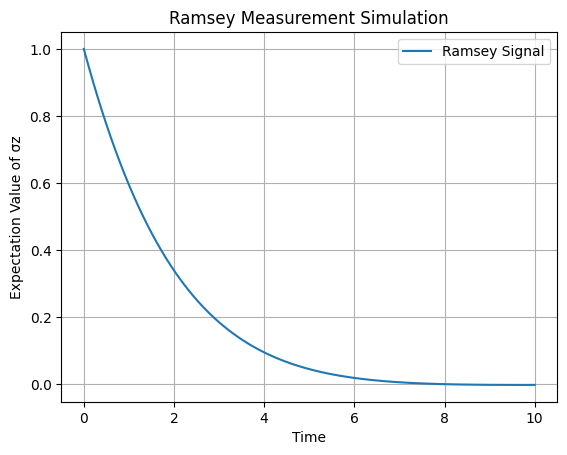

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from qutip import basis, sigmax, sigmaz, qeye, mesolve, tensor

# Define parameters
omega_q = 1.0  # Qubit frequency
delta = 0.1  # Detuning
T2_star = 5.0  # Coherence time
times = np.linspace(0, 10, 100)  # Time points

# Define operators
sx = sigmax()
sz = sigmaz()
I = qeye(2)

# Define Hamiltonian (free evolution with detuning)
H = delta * sz

# Initial state (after first π/2 pulse)
psi0 = (basis(2, 0) + basis(2, 1)).unit()

# Solve the time evolution
result = mesolve(H, psi0, times, [sigmam().dag()], [sx])

# Plot the Ramsey fringes
plt.plot(times, result.expect[0], label="Ramsey Signal")
plt.xlabel("Time")
plt.ylabel("Expectation Value of σz")
plt.title("Ramsey Measurement Simulation")
plt.legend()
plt.grid(True)
plt.show()

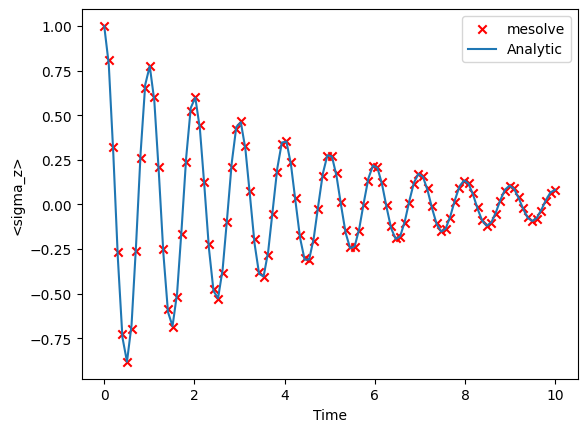

In [92]:
# coefficients
delta = 2 * np.pi
g = 0.25

# hamiltonian
H = delta / 2.0 * sigmax()

# list of collapse operators
c_ops = [np.sqrt(g) * sigmaz()]

# initial state
#psi0 = (basis(2, 0)+basis(2,1)).unit()
psi0 = basis(2, 0)

# times
tlist = np.linspace(0, 10, 100)

res = mesolve(H, psi0, tlist, c_ops, [sigmaz()])

sz_analytic = np.cos(2 * np.pi * tlist) * np.exp(-tlist * g)

plt.scatter(tlist, res.expect[0], c="r", marker="x", label="mesolve")
plt.plot(tlist, sz_analytic, label="Analytic")
plt.xlabel("Time"), plt.ylabel("<sigma_z>")
plt.legend();

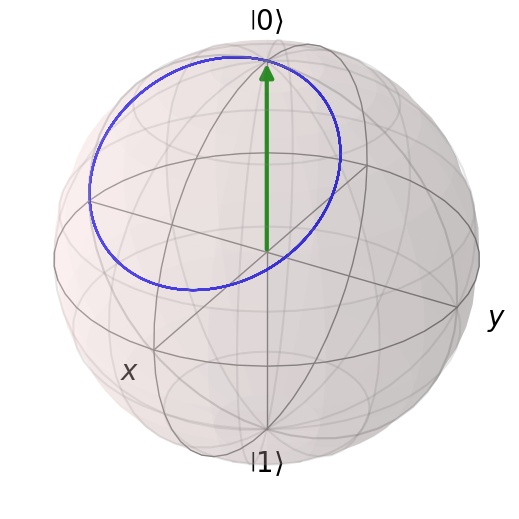

In [40]:
# Angle
theta = 0.2 * np.pi

# Hamiltonian
H = delta * (np.cos(theta) * sigmaz() + np.sin(theta) * sigmax())

# Obtain Time Evolution
tlist = np.linspace(0, 5, 1000)
result = mesolve(H, psi0, tlist, [], [sigmax(), sigmay(), sigmaz()])

# Extract expectation values for pauli matrices
exp_sx_circ, exp_sy_circ, exp_sz_circ = result.expect
exp_sx_circ, exp_sy_circ, exp_sz_circ = (
    np.array(exp_sx_circ),
    np.array(exp_sy_circ),
    np.array(exp_sz_circ),
)

# Create Bloch sphere plot
sphere = Bloch()
sphere.add_points([exp_sx_circ, exp_sy_circ, exp_sz_circ], meth="l")
sphere.add_states(psi0)
sphere.show()

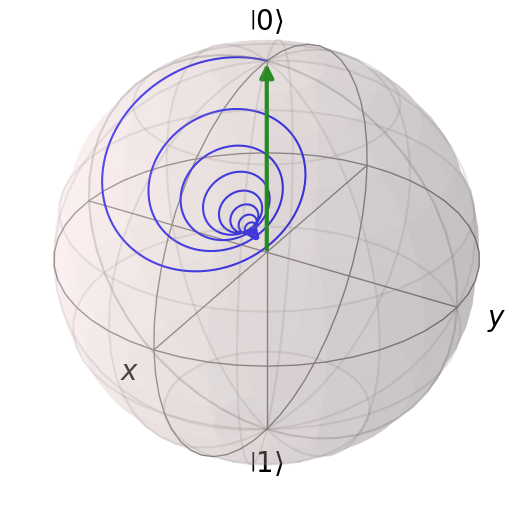

In [41]:
gamma_phase = 0.5
c_ops = [np.sqrt(gamma_phase) * sigmaz()]

# solve dynamics
result = mesolve(H, psi0, tlist, c_ops, [sigmax(), sigmay(), sigmaz()])
exp_sx_dephase, exp_sy_dephase, exp_sz_dephase = result.expect
exp_sx_dephase, exp_sy_dephase, exp_sz_dephase = (
    np.array(exp_sx_dephase),
    np.array(exp_sy_dephase),
    np.array(exp_sz_dephase),
)

# Create Bloch sphere plot
sphere = Bloch()
sphere.add_points([exp_sx_dephase, exp_sy_dephase, exp_sz_dephase], meth="l")
sphere.add_states(psi0)
sphere.show()

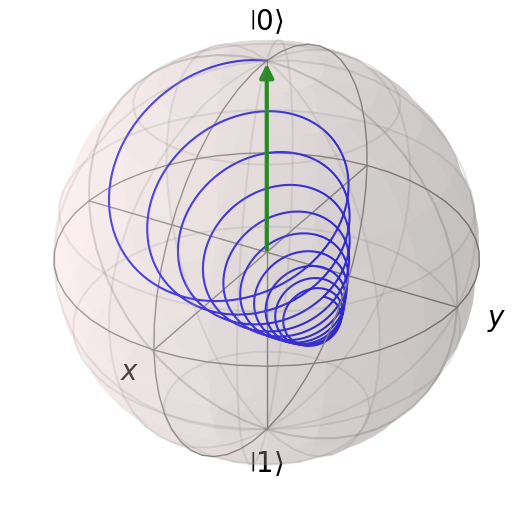

In [42]:
gamma_relax = 0.5
c_ops = [np.sqrt(gamma_relax) * sigmam()]

# solve dynamics
result = mesolve(H, psi0, tlist, c_ops, [sigmax(), sigmay(), sigmaz()])
exp_sx_relax, exp_sy_relax, exp_sz_relax = result.expect

# Create Bloch sphere plot
sphere = Bloch()
sphere.add_points([exp_sx_relax, exp_sy_relax, exp_sz_relax], meth="l")
sphere.add_states(psi0)
sphere.show()

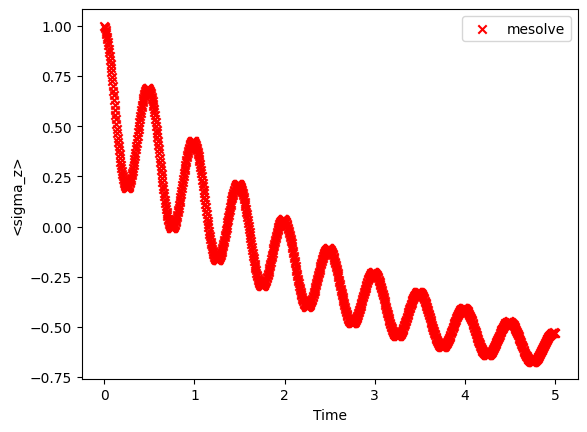

In [44]:
plt.scatter(tlist, exp_sz_relax, c="r", marker="x", label="mesolve")
#plt.plot(tlist, sz_analytic, label="Analytic")
plt.xlabel("Time"), plt.ylabel("<sigma_z>")
plt.legend();

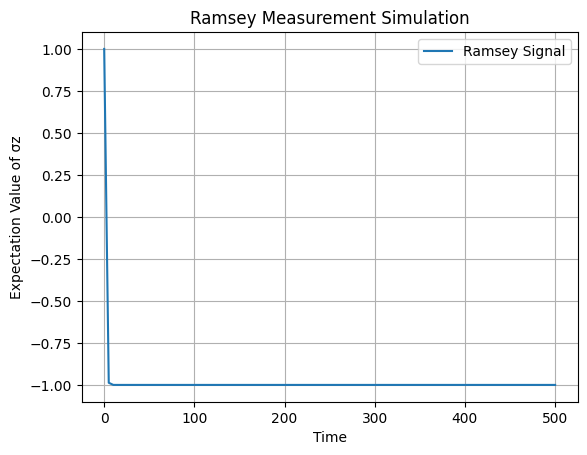

In [60]:
# Define parameters
omega_q = 1.0  # Qubit frequency
delta = 0.1  # Detuning
T2_star = 5.0  # Coherence time
times = np.linspace(0, 500, 100)  # Time points

# Define operators
sx = sigmax()
sz = sigmaz()
I = qeye(2)

# Define Hamiltonian (free evolution with detuning)
H = delta * sz

# Initial state (after first π/2 pulse)
psi0 = (basis(2, 0) + basis(2, 1)).unit()
psi0 = basis(2,0)

# Solve the time evolution
result = mesolve(H, psi0, times, [sigmam()], [sz])

# Plot the Ramsey fringes
plt.plot(times, result.expect[0], label="Ramsey Signal")
plt.xlabel("Time")
plt.ylabel("Expectation Value of σz")
plt.title("Ramsey Measurement Simulation")
plt.legend()
plt.grid(True)
plt.show()

In [1]:
import numpy as np
from qutip import about, basis, brmesolve, destroy, plot_expectation_values

In [7]:
# num modes
N = 2
# Hamiltonian
a = destroy(N)
H = a.dag() * a

# initial state
psi0 = basis(N, N - 1)

# times for simulation
times = np.linspace(0, 20, 100)

# solve using brmesolve
result_const = brmesolve(H, psi0, times, e_ops=[a.dag() * a])

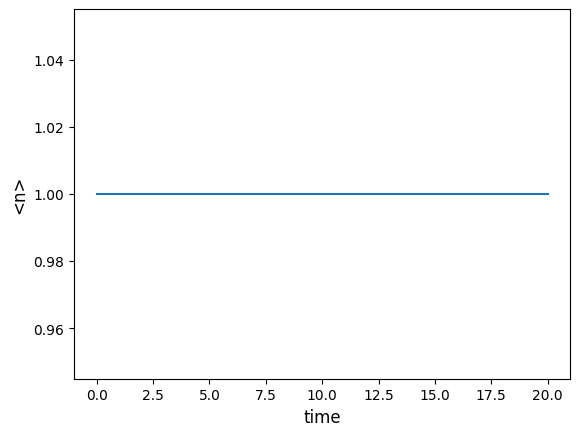

In [8]:
plot_expectation_values(result_const, ylabels=["<n>"]);

In [9]:
time_dependence = "sin(t)"

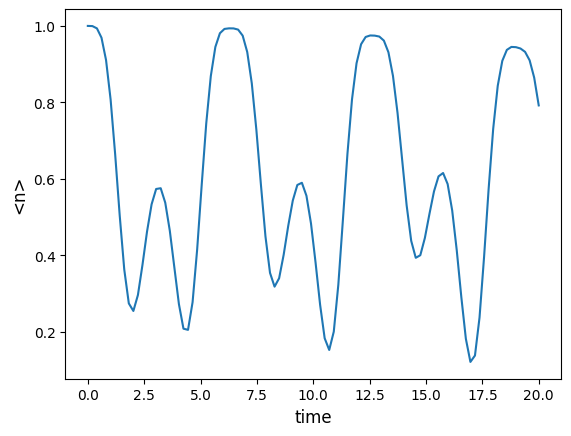

In [10]:
H_t = [H, [a + a.dag(), time_dependence]]
result_brme = brmesolve(H_t, psi0, times, e_ops=[a.dag() * a])
plot_expectation_values(result_brme, ylabels=["<n>"]);